# Project: Investigate a Dataset - [Dataset-No-show-appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


<a id='intro'></a>
## Introduction

### Overview
>To complete my Data Analysis project I am using No-show appointments dataset.

>The dataset contains 110528 Entry of the Patient info that are {'age','AppointmentID','ScheduledDay','Neighbourhood','Hipertension','Scholarship','Diabetes','Alcoholism','Handcap'}

>The dataset is a collected data for doctor appointments and associated characteristics including if the patient show-up or no-show the appointment and some other factors. You can read more about the dataset here We are going to answer some questions to discover related factors that affect attending the appointment.


### Question that can analyised from this data set


<li>Q1: Which gender is more likely to miss their appointment?
<li>Q2: What is the relation between age group and no-show?
<li>Q3: Does scholarship affect show-up?
<li>Q4: How do health conditions affect show-up?
<li>Q5: Does receiving SMS increase the chances of show-up?
<li>Q6: Which appointment weekday has much no-show ratio?

In [43]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

#importing important files 
import pandas as pd
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> After observing the dataset and proposed questions for the analysis we will be keeping only relevent data deleting the unsued data so that we can make our calculation easy and understandable.


In [44]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

#loading the csv file and storing it in the variable "app_data"
app_data = pd.read_csv('KaggleV2-May-2016.csv')

#printing first five rows with defined columns of tmdb-movies database
app_data.head(8)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes


### Overview of Data
<li>The data in Scheduledday and in the appointmentDay are same so no need of appointmentDay columns
<li>No show column says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up

### Data Cleaning

Important observation regarding this process

<li>We need to remove unused column such as PatientId,AppointmentID in Data anlysis
<li>Removing the duplicacy in the rows(if any).
<li>Changing Scheduleday column into date format.
<li>Replacing zero with yes in No show column and one with no.
<li>Renaming the hipertension as hypertension(spelling Mistake)


** 1. Removing Unused columns**

<li>Columns that we need to delete are - AppointmentID,PatientId

In [45]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [46]:
app_data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [47]:
# Correcting the column names
app_data.rename(columns={'Hipertension':'Hypertension','Handcap':'Handicap', 'No-show':'no_show'},inplace=True)

In [48]:
# Change column names to lowercase to be easier in analysis codes
app_data.rename(columns =str.lower,inplace=True)

In [49]:
# Drop the useless columns
app_data.drop(['patientid','appointmentid'], axis=1,inplace=True)

In [50]:
# Drop the wrong age value row
app_data.query('age==-1')

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
99832,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [51]:
app_data.drop([99832],inplace=True)

In [52]:
app_data.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [53]:
# Find out how many wrong handicap values
wrong_hand = app_data.query('handicap > 1')
wrong_hand.shape




(199, 12)

In [54]:
# Removing th wrong handicap enteries 
app_data.drop(wrong_hand.index,inplace=True)

In [55]:
app_data.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000
mean,37.070753,0.098281,0.196833,0.071605,0.030382,0.018509,0.321182
std,23.098052,0.297695,0.397607,0.257834,0.171638,0.134782,0.466932
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
# Fix dates data type
app_data['scheduledday'] = pd.to_datetime(app_data['scheduledday'])
app_data['appointmentday'] = pd.to_datetime(app_data['appointmentday'])
app_data.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [57]:
# Replace date format in the columns scheduled day and appointment day to weekdays to use in the analysis
app_data['scheduledday'] = app_data['scheduledday'].dt.day_name()
app_data['appointmentday'] = app_data['appointmentday'].dt.day_name()
app_data.head(8)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,Friday,Friday,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,Friday,Friday,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,Friday,Friday,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,Friday,Friday,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,Friday,Friday,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,F,Wednesday,Friday,76,REPÚBLICA,0,1,0,0,0,0,No
6,F,Wednesday,Friday,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,F,Wednesday,Friday,39,GOIABEIRAS,0,0,0,0,0,0,Yes


In [58]:
app_data.shape

(110327, 12)

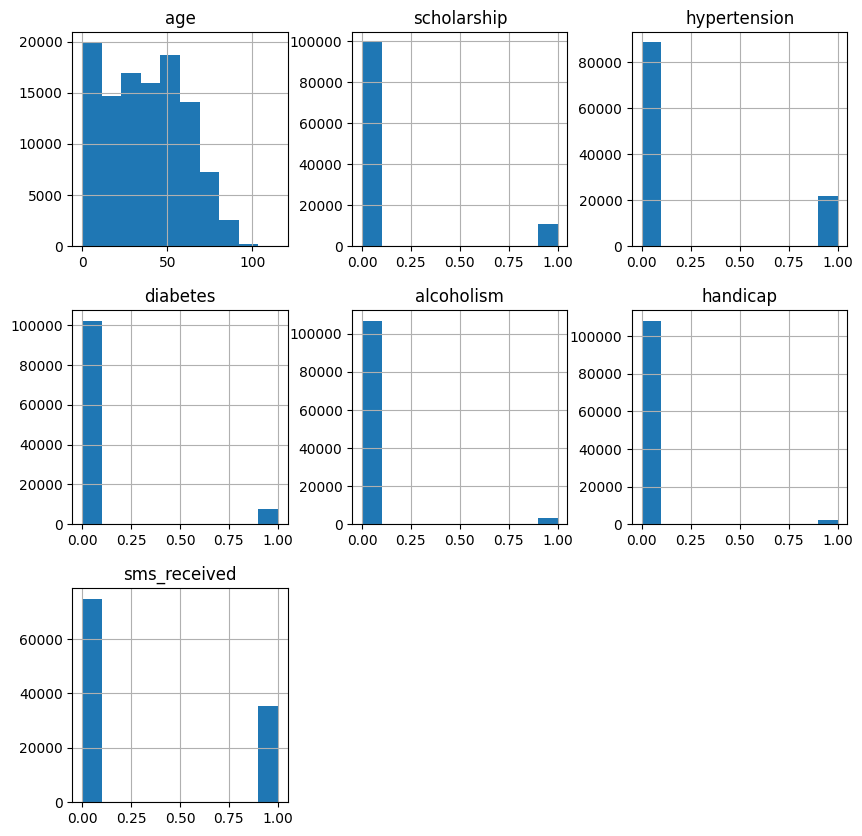

In [59]:
app_data.hist(figsize=(10,10));

<li> overall analysis of the data using hist graph

In [60]:
# Create masks for no show columns
not_show = app_data.no_show=="Yes"
show_up = app_data.no_show=="No"

### Which gender is more likely to miss their appointment

In [61]:
# Explore no-show for each gender
app_data.gender[not_show].value_counts()

gender
F    14568
M     7710
Name: count, dtype: int64

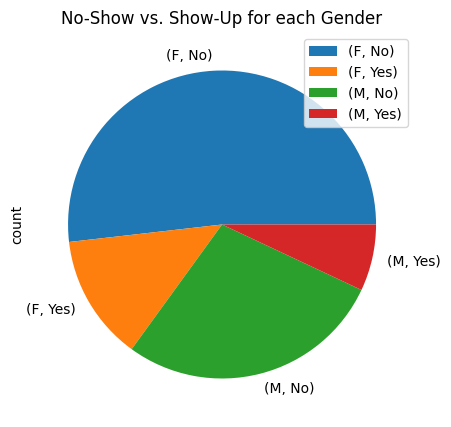

In [62]:
app_data.groupby(by='gender')['no_show'].value_counts().plot(kind='pie',figsize=(5,5))
plt.title('No-Show vs. Show-Up for each Gender')
plt.title('No-Show vs. Show-Up for each Gender')
plt.legend();

- It seems that the number of the female patient is more in the database so acqurie more space in the  pie daigram
<li> So dealing with such condition converting the male and female in percentage with respect to no show and show up enteries

In [63]:
# Converting the gender in percentage for no show and yes show
gender_data = (app_data.groupby(by='no_show').gender.value_counts(normalize=True))
gender_data = gender_data.mul(100).rename('Percentage').reset_index()
gender_data

,no_show,gender,Percentage
0,No,F,64.920669
1,No,M,35.079331
2,Yes,F,65.391866
3,Yes,M,34.608134


<li> Converted the data into percentage from it will easy to analaysis with percentage form

### Does scholarship affect show-up?

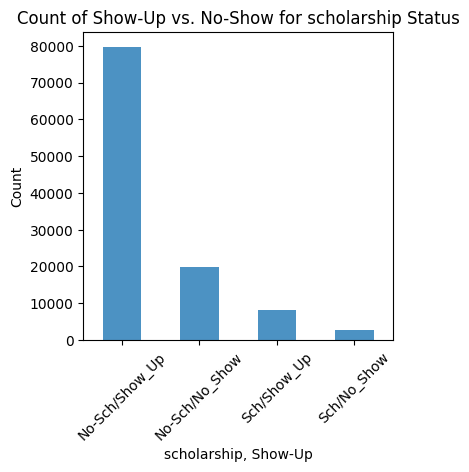

In [64]:
# by using bar graph seen the relationship between the scholarship affect show up enteris
app_data.groupby(by='scholarship').no_show.value_counts().plot(kind='bar',alpha=0.8,figsize=(4,4)).set_xticklabels(['No-Sch/Show_Up','No-Sch/No_Show','Sch/Show_Up','Sch/No_Show'],rotation=45)
plt.title('Count of Show-Up vs. No-Show for scholarship Status')
plt.ylabel('Count')
plt.xlabel('scholarship, Show-Up');                                                                                                                  

-It seems that patients who have scholarship tends to no-show_up. Let's take a look on the ratios

<li> To see the relationship between scholarship and non scholarship patients

In [65]:
scholarship_percent = (app_data.query('scholarship==1').loc[not_show].scholarship.value_counts()/app_data.query('scholarship==1').scholarship.value_counts())*100
noscholarship_percent = (app_data.query('scholarship==0').loc[not_show].scholarship.value_counts()/app_data.query('scholarship==0').scholarship.value_counts())*100
scholarship_percent, noscholarship_percent

(scholarship
 1    23.766485
 Name: count, dtype: float64,
 scholarship
 0    19.803184
 Name: count, dtype: float64)

### Relationship between age group and no show using bin graphs


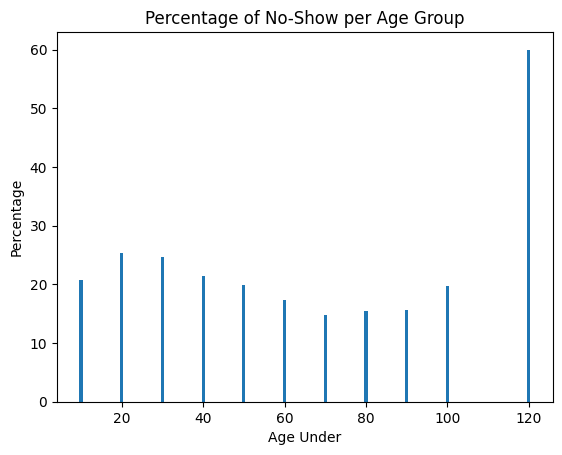

In [66]:
# Compare no-show percentage in each age group
# Create bins and labels
bins = [0,10,20,30,40,50,60,70,80,90,100,110,120]
labels = [10,20,30,40,50,60,70,80,90,100,110,120]
# Create new app_data for the grouped bins with counts 
t= app_data.groupby(pd.cut(app_data['age'], bins,labels=labels)).size()
t_app_data=t.rename('total').reset_index()
# Create another app_data for the grouped bins with no-show counts
s= app_data.groupby(pd.cut(app_data[not_show]['age'], bins,labels=labels)).size()
s_app_data=s.rename('not').reset_index()
# Merge and create column for percentage
agegrp_app_data= s_app_data.set_index('age').merge(t_app_data,how='outer',on='age')
agegrp_app_data['percent']=agegrp_app_data['not']*100/agegrp_app_data['total']
# Visualize
plt.bar(agegrp_app_data['age'],agegrp_app_data['percent'])
plt.xlabel('Age Under')
plt.ylabel('Percentage')
plt.title('Percentage of No-Show per Age Group');

<li>The people aged 10 to 30 have the most No-Show percentage, while those aged 60 to 90 are the lowest to No-Show.

### Which appointment weekday has much no-show ratio

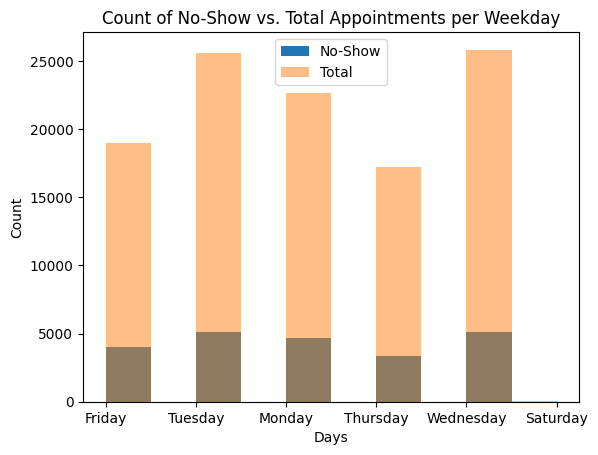

In [67]:
# Explore count of no-show and total per weekday
plt.hist(app_data[not_show].appointmentday,label=['No-Show'])
plt.hist(app_data.appointmentday,label=['Total'],alpha=0.5)
plt.title('Count of No-Show vs. Total Appointments per Weekday')
plt.xlabel('Days')
plt.ylabel('Count')
plt.legend();

<li> The weekdays has no significant effect on the attendance

### How do health conditions affect show-up

In [68]:
# Create function to analyze the health conditions
def disease(app_data, case):
    app_data = app_data.groupby(by='no_show')[case].value_counts(normalize=True)
    app_data = app_data.mul(100).rename('Percent').reset_index()
    g = sns.catplot(x='no_show', y='Percent',hue=case, kind='bar', data=app_data)
    g.ax.set_ylim(0,100)
    plt.title('Percentage of No-Show vs. Show-Up for {} Patients'.format(case))
    plt.xlabel('No-Show');

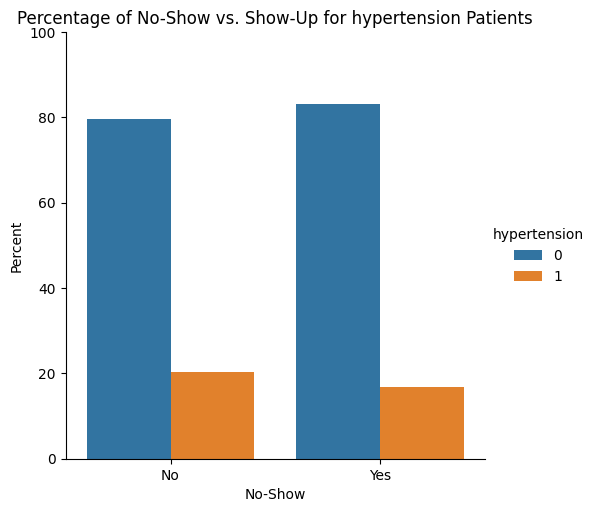

In [69]:
# Effect of hypertension on appointment attendance
disease(app_data,'hypertension')

Hypertension patients are slightly more propably to attend their appointments.

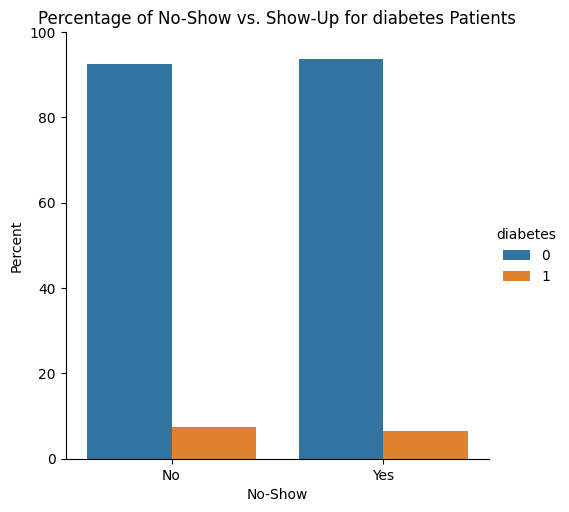

In [71]:
#Effect of diabetes on appointment attendance
disease(app_data,'diabetes')

In [1]:
Diabetic patients has almost the same attendance percentage comparing to non-diabetics.

SyntaxError: invalid syntax (3131866583.py, line 1)

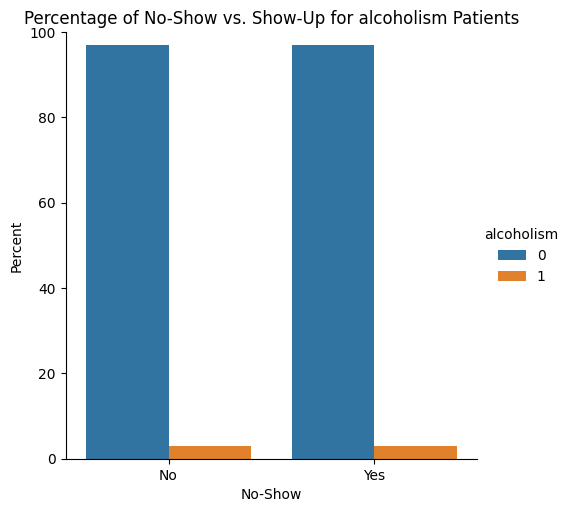

In [72]:
#Effect of alcoholism on appointment attendance
disease(app_data,'alcoholism')

<li>Alcoholics has almost the same attendance percentage comparing to non-alcoholics.

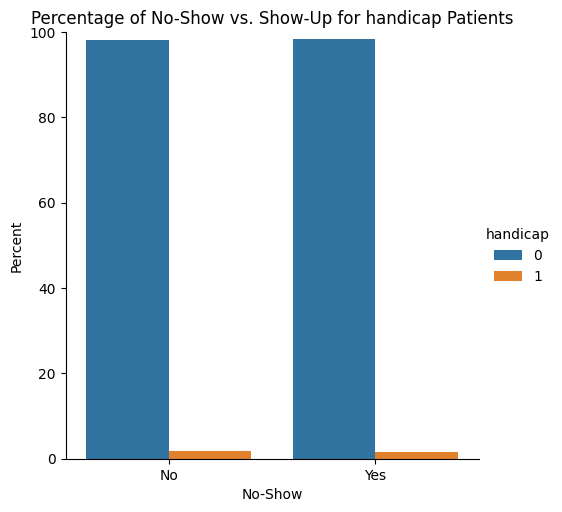

In [73]:
#Effect of handicap on appointment attendance
disease(app_data,'handicap')

<li> Handicaps has almost the same attendance percentage comparing to non-handicaps.

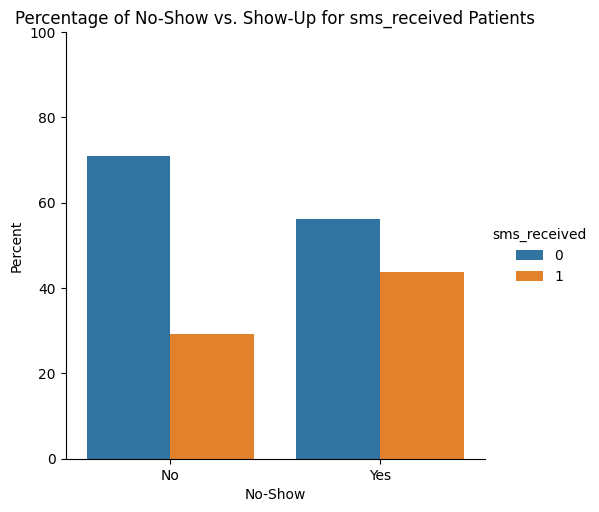

In [75]:
#Effect of SMS receiving on appointment attendance
disease(app_data,'sms_received')

<li>Surprising! The percentage of no-show is greater in patients who received SMS. It seems that there is something wrong in the SMS content.

### Conclusions
<li> Age affects no-show e.g. lowest between 60 to 90 where they are mostly retired and have plenty of time, while highest between 10 to 30
<li> Scholarship decreases the no-show ratio.
<li> Hypertension patients are less likely to no-show.
<li> Receiving SMS increases the no-show which is weired, so the text need to be reviewed.
<li> Other factors doesn't seem to affect no-show rate.

### Limitaions¶
<li> Prioritizing correlations: where these relations between variables may be just a coincidence without being causative.

<li> Duplicates: there are 48k duplicated id rows but I prefered to keep them as they are for different appointments and diiferent show-up status.

In [3]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Data.ipynb

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern 'Investigate_a_Data.ipynb' matched no files
